In [333]:
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [107]:
df_covid_stats = pd.read_excel('covid_stats.xlsx')

In [108]:
df_covid_stats.head(5)

,Date,Total Cases,Total Death
0,2020-03-10,6,NaN
1,2020-03-11,10,NaN
2,2020-03-12,13,1.0
3,2020-03-13,8,1.0
4,2020-03-14,16,2.0


In [109]:
df_covid_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         60 non-null     datetime64[ns]
 1   Total Cases  60 non-null     int64         
 2   Total Death  58 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 KB


In [110]:
df = pd.read_pickle('india_dataset_Mar_Apr.pkl')

In [111]:
df.published_at[:5]

0    2020-04-06
1    2020-04-06
2    2020-04-06
3    2020-04-06
4    2020-04-06
Name: published_at, dtype: object

In [112]:
df_news_vol = df[['published_at', 'title']].groupby(by='published_at').count().reset_index()
df_news_vol.columns = ['published_at', 'News Volume']

In [113]:
df_news_vol.head(5)

,published_at,News Volume
0,2020-03-10,141
1,2020-03-11,197
2,2020-03-12,228
3,2020-03-13,252
4,2020-03-14,240


In [114]:
df_news_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   published_at  32 non-null     object
 1   News Volume   32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [115]:
df_news_vol['published_at'] = pd.to_datetime(df_news_vol['published_at'])
df_news_vol.head()

,published_at,News Volume
0,2020-03-10,141
1,2020-03-11,197
2,2020-03-12,228
3,2020-03-13,252
4,2020-03-14,240


In [116]:
df_merged = pd.merge(df_news_vol, df_covid_stats, left_on='published_at', right_on='Date')
df_merged.head()

,published_at,News Volume,Date,Total Cases,Total Death
0,2020-03-10,141,2020-03-10,6,NaN
1,2020-03-11,197,2020-03-11,10,NaN
2,2020-03-12,228,2020-03-12,13,1.0
3,2020-03-13,252,2020-03-13,8,1.0
4,2020-03-14,240,2020-03-14,16,2.0


In [117]:
df_merged.drop(columns='published_at', inplace=True)

In [118]:
df_merged.set_index('Date', inplace=True)

In [119]:
df_merged.head()

,News Volume,Total Cases,Total Death
Date,,,
2020-03-10,141,6,NaN
2020-03-11,197,10,NaN
2020-03-12,228,13,1.0
2020-03-13,252,8,1.0
2020-03-14,240,16,2.0


In [120]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-10 to 2020-04-10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   News Volume  32 non-null     int64  
 1   Total Cases  32 non-null     int64  
 2   Total Death  30 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


### Time Series Plot

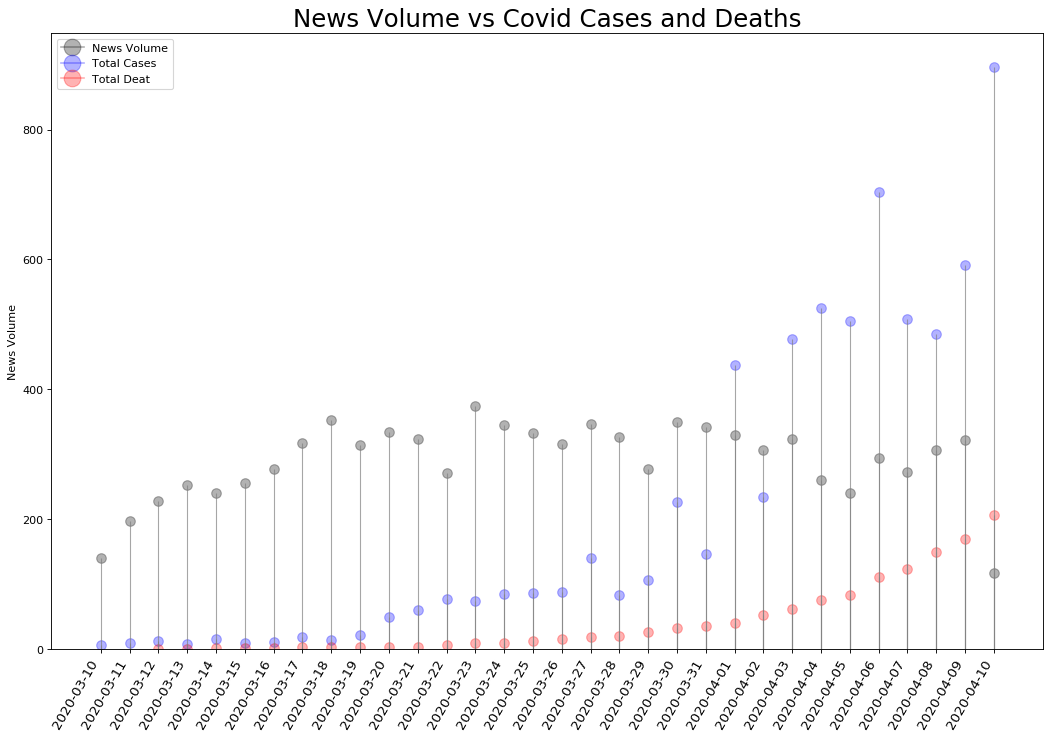

In [222]:
columns = ['News Volume', 'Total Cases', 'Total Death']
colors = ['black', 'blue', 'red']

plt.style.use('default') 

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

for i, column in enumerate(columns):
    ax.vlines(x=df_merged.index, ymin=0, ymax=df_merged[column], color='grey', alpha=0.7, linewidth=1)
    ax.scatter(x=df_merged.index, y=df_merged[column], s=75, color=colors[i], alpha=0.3)

# Title, Label, Ticks and Ylim
ax.set_title('News Volume vs Covid Cases and Deaths', fontdict={'size':22})
ax.set_ylabel('News Volume')
ax.set_xticks(df_merged.index)
ax.set_xticklabels(df_merged.index.date, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(bottom=0)


# Setting legend
legend_elements = [Line2D([0], [0], marker='o', color='black', label='News Volume', alpha=0.3, markersize=15),
                   Line2D([0], [0], marker='o', color='blue', label='Total Cases', alpha=0.3, markersize=15),
                   Line2D([0], [0], marker='o', color='red', label='Total Deat', alpha=0.3, markersize=15)]
ax.legend(handles=legend_elements, loc='upper left')

# # Annotate
# for row in df_merged.itertuples():
#     ax.text(row.Index, row.title+.5, s=round(row.title, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.show()

### Counting how many times corona/covid occured per day in titles

In [122]:
df.head(2)

,author,content,description,publishedAt,source.name,title,url,urlToImage,country,published_at,content_tokenized,content_normalized,title_tokenized,title_normalized,description_tokenized,description_normalized
0,Jacob Koshy,The spectre of COVID-19 has made its appearanc...,NTCA mulls test after a big cat tested positiv...,2020-04-06T18:36:02Z,The Hindu,Pench tiger death raises COVID-19 fears,https://www.thehindu.com/news/national/pench-t...,https://www.thehindu.com/news/national/kfposq/...,India,2020-04-06,"[[The, spectre, COVID-19, made, appearance, on...","[[The, spectre, covid-19, make, appearance, on...","[[Pench, tiger, death, raises, COVID-19, fears]]","[[pench, tiger, death, raise, covid-19, fear]]","[[NTCA, mulls, test, big, cat, tested, positiv...","[[ntca, mull, test, big, cat, test, positive, ..."
1,Serena Josephine M,Every time a person tests positive for coronav...,"As of now, officials have tracked approximatel...",2020-04-06T11:40:08Z,The Hindu,"COVID-19: Contact tracing, a crucial exercise",https://www.thehindu.com/news/national/tamil-n...,https://www.thehindu.com/news/national/tamil-n...,India,2020-04-06,"[[Every, time, person, tests, positive, corona...","[[Every, time, person, test, positive, coronav...","[[COVID-19, Contact, tracing, crucial, exercise]]","[[covid-19, contact, trace, crucial, exercise]]","[[As, officials, tracked, approximately, 7,000...","[[As, official, track, approximately, 7,000, c..."


In [123]:
from nltk.corpus import stopwords
import string
STOPWORDS = set(stopwords.words('english'))

def clean_tokens(token_sequences):
    cleaned_token_sequences = []
    for token_list in token_sequences:
        tokens = [x.strip().lower() for x in token_list if x != 'char' and x.strip().lower() not in STOPWORDS 
                      and x.strip() not in string.punctuation and x.strip() not in ['’', '‘' , '–', '\'s', 'n\'t' , '’', '``', "''"] 
                      and '…' not in x and '+' not in x and len(x) != 1]
        tokens = ['covid-19' if x == 'covid' else x for x in tokens]
        tokens = ['coronavirus' if x == 'corona' else x for x in tokens]
        tokens = ['government' if x == 'govt' else x for x in tokens]
        tokens = ['modi' if x == 'namo' else x for x in tokens]
        cleaned_token_sequences.append(tokens)
    return cleaned_token_sequences

In [124]:
def word_count_title(x, words_list):
    title_tokens = x[0]
    if len(words_list) == 1:
        return title_tokens.count(words_list[0])
    elif len(words_list) >1 :
        return sum([title_tokens.count(each_word) for each_word in words_list])
    else:
        raise Exception("Recheck Wordlist")

In [125]:
covid_words_list = ['covid-19','corona', 'coronavirus']
central_government_list = ['government', 'modi', 'pm']
healthcare_list = ['doctor', 'healthcare', 'vaccine', 'cure', 'hospital', 'test', 'testing']

In [126]:
df['title_cleaned'] = df.title_normalized.apply(lambda x: clean_tokens(x))

In [160]:
df['Covid Count'] = df.title_cleaned.apply(lambda x: word_count_title(x, covid_words_list))
df['Central Gov Count'] = df.title_cleaned.apply(lambda x: word_count_title(x, central_government_list))
df['Healthcare Count'] = df.title_cleaned.apply(lambda x: word_count_title(x, healthcare_list))

In [161]:
df['Covid Count'].value_counts()

1    6741
0    2418
2     130
Name: Covid Count, dtype: int64

In [162]:
df['Central Gov Count'].value_counts()

0    8948
1     336
2       5
Name: Central Gov Count, dtype: int64

In [163]:
df['Healthcare Count'].value_counts()

0    8165
1    1056
2      66
3       2
Name: Healthcare Count, dtype: int64

In [171]:
df_bow_extended = df[['Covid Count', 'Central Gov Count', 'Healthcare Count', 'published_at']].groupby(by='published_at').sum().reset_index()
df_bow_extended

,published_at,Covid Count,Central Gov Count,Healthcare Count
0,2020-03-10,102,1,16
1,2020-03-11,143,12,24
2,2020-03-12,171,7,27
3,2020-03-13,199,13,23
4,2020-03-14,187,4,24
5,2020-03-15,201,5,29
6,2020-03-16,209,8,37
7,2020-03-17,238,9,47
8,2020-03-18,254,17,41
9,2020-03-19,230,14,29


### Joining this information with df_merged

In [172]:
df_bow_extended['published_at'] = pd.to_datetime(df_bow_extended['published_at'])
df_merged_extended = pd.merge(df_merged, df_bow_extended, left_on='Date', right_on='published_at')
df_merged_extended.head()

,News Volume,Total Cases,Total Death,published_at,Covid Count,Central Gov Count,Healthcare Count
0,141,6,NaN,2020-03-10,102,1,16
1,197,10,NaN,2020-03-11,143,12,24
2,228,13,1.0,2020-03-12,171,7,27
3,252,8,1.0,2020-03-13,199,13,23
4,240,16,2.0,2020-03-14,187,4,24


In [278]:
import datetime
custom_text = "Generated by NRoy@https://github.com/royn5618 on " + str(datetime.datetime.now().date())
custom_text

'Generated by NRoy@https://github.com/royn5618 on 2020-05-18'

(737494.0, 737525.0)
(0.0, 900.0)


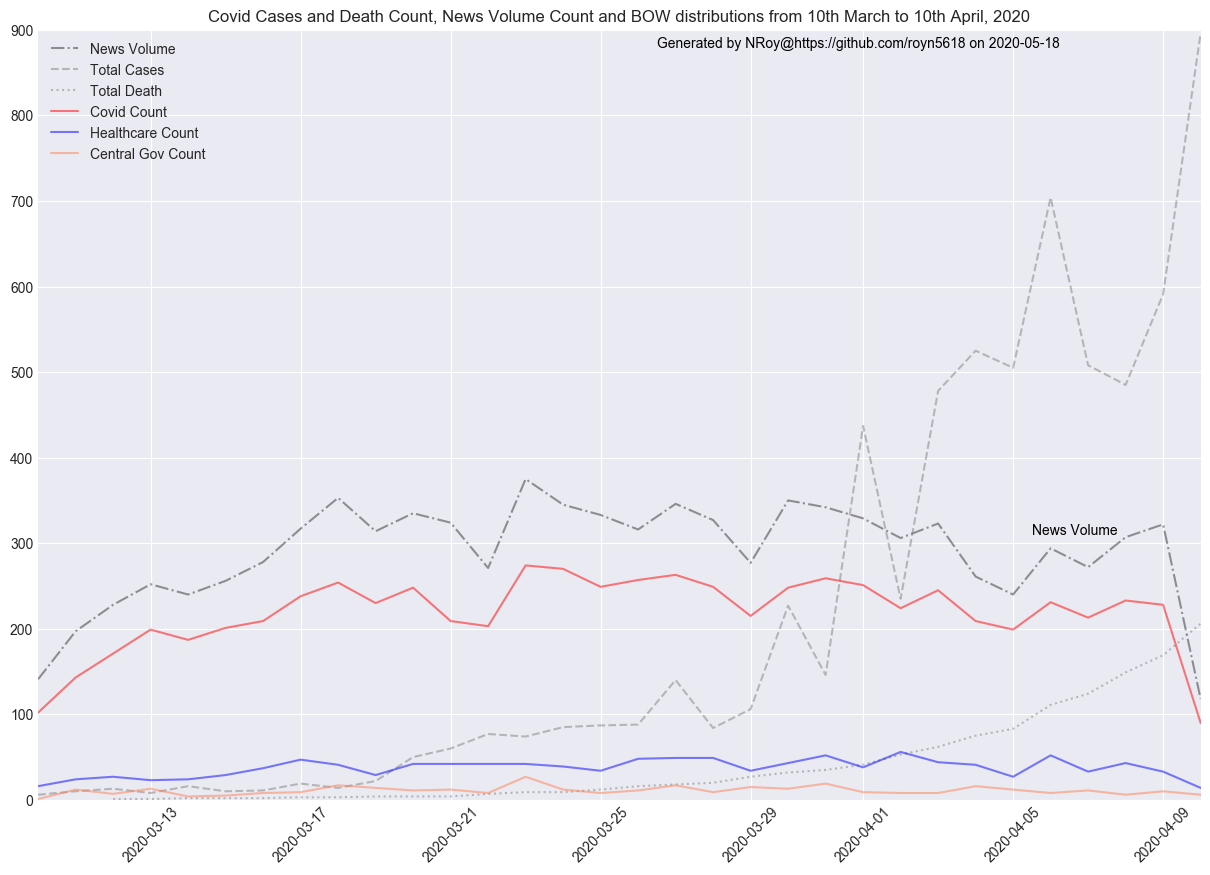

In [309]:
plt.close()
columns = ['Total Cases', 'Total Death']
columns_bow = ['Covid Count', 'Healthcare Count', 'Central Gov Count']
colors = ['black', 'blue', 'red']
colors_bow = ['red', 'blue', 'coral']
markers = ['--', ':']

plt.style.use('seaborn-darkgrid') 
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)

ax.plot('published_at', 'News Volume', '-.', data=df_merged_extended, color='black', alpha = 0.4)

for i, column in enumerate(columns):
    ax.plot('published_at', column, markers[i], data=df_merged_extended, color='grey', alpha = 0.5)
    

for i, column in enumerate(columns_bow):
    ax.plot('published_at', column, data=df_merged_extended, color=colors_bow[i], alpha = 0.5)

plt.title('Covid Cases and Death Count, News Volume Count and BOW distributions from 10th March to 10th April, 2020')
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.xlim(min(df_merged_extended['published_at']), max(df_merged_extended['published_at']))
print(ax.get_xlim())
print(ax.get_ylim())
plt.text(737520.5, 310, 'News Volume', size='medium', color='black')
plt.text(737510.5, 880, custom_text, size='medium', color='black')
plt.legend()

plt.show()

In [308]:
df_merged_extended.head(5)

,News Volume,Total Cases,Total Death,published_at,Covid Count,Central Gov Count,Healthcare Count
0,141,6,NaN,2020-03-10,102,1,16
1,197,10,NaN,2020-03-11,143,12,24
2,228,13,1.0,2020-03-12,171,7,27
3,252,8,1.0,2020-03-13,199,13,23
4,240,16,2.0,2020-03-14,187,4,24


### Let's Play a bit wit correlations

Text(0, 0.5, 'Covid Count')

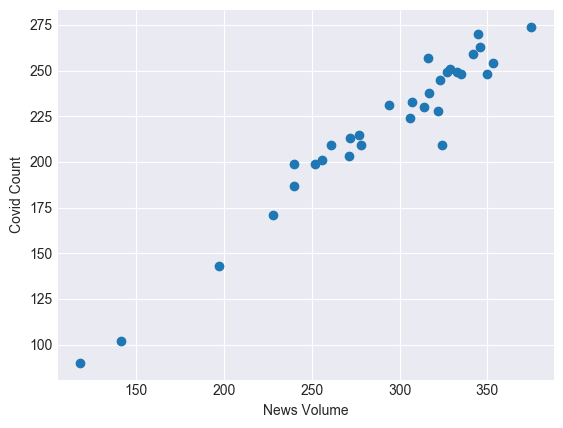

In [312]:
plt.scatter(df_merged_extended['News Volume'], df_merged_extended['Covid Count'])
plt.xlabel('News Volume')
plt.ylabel('Covid Count')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


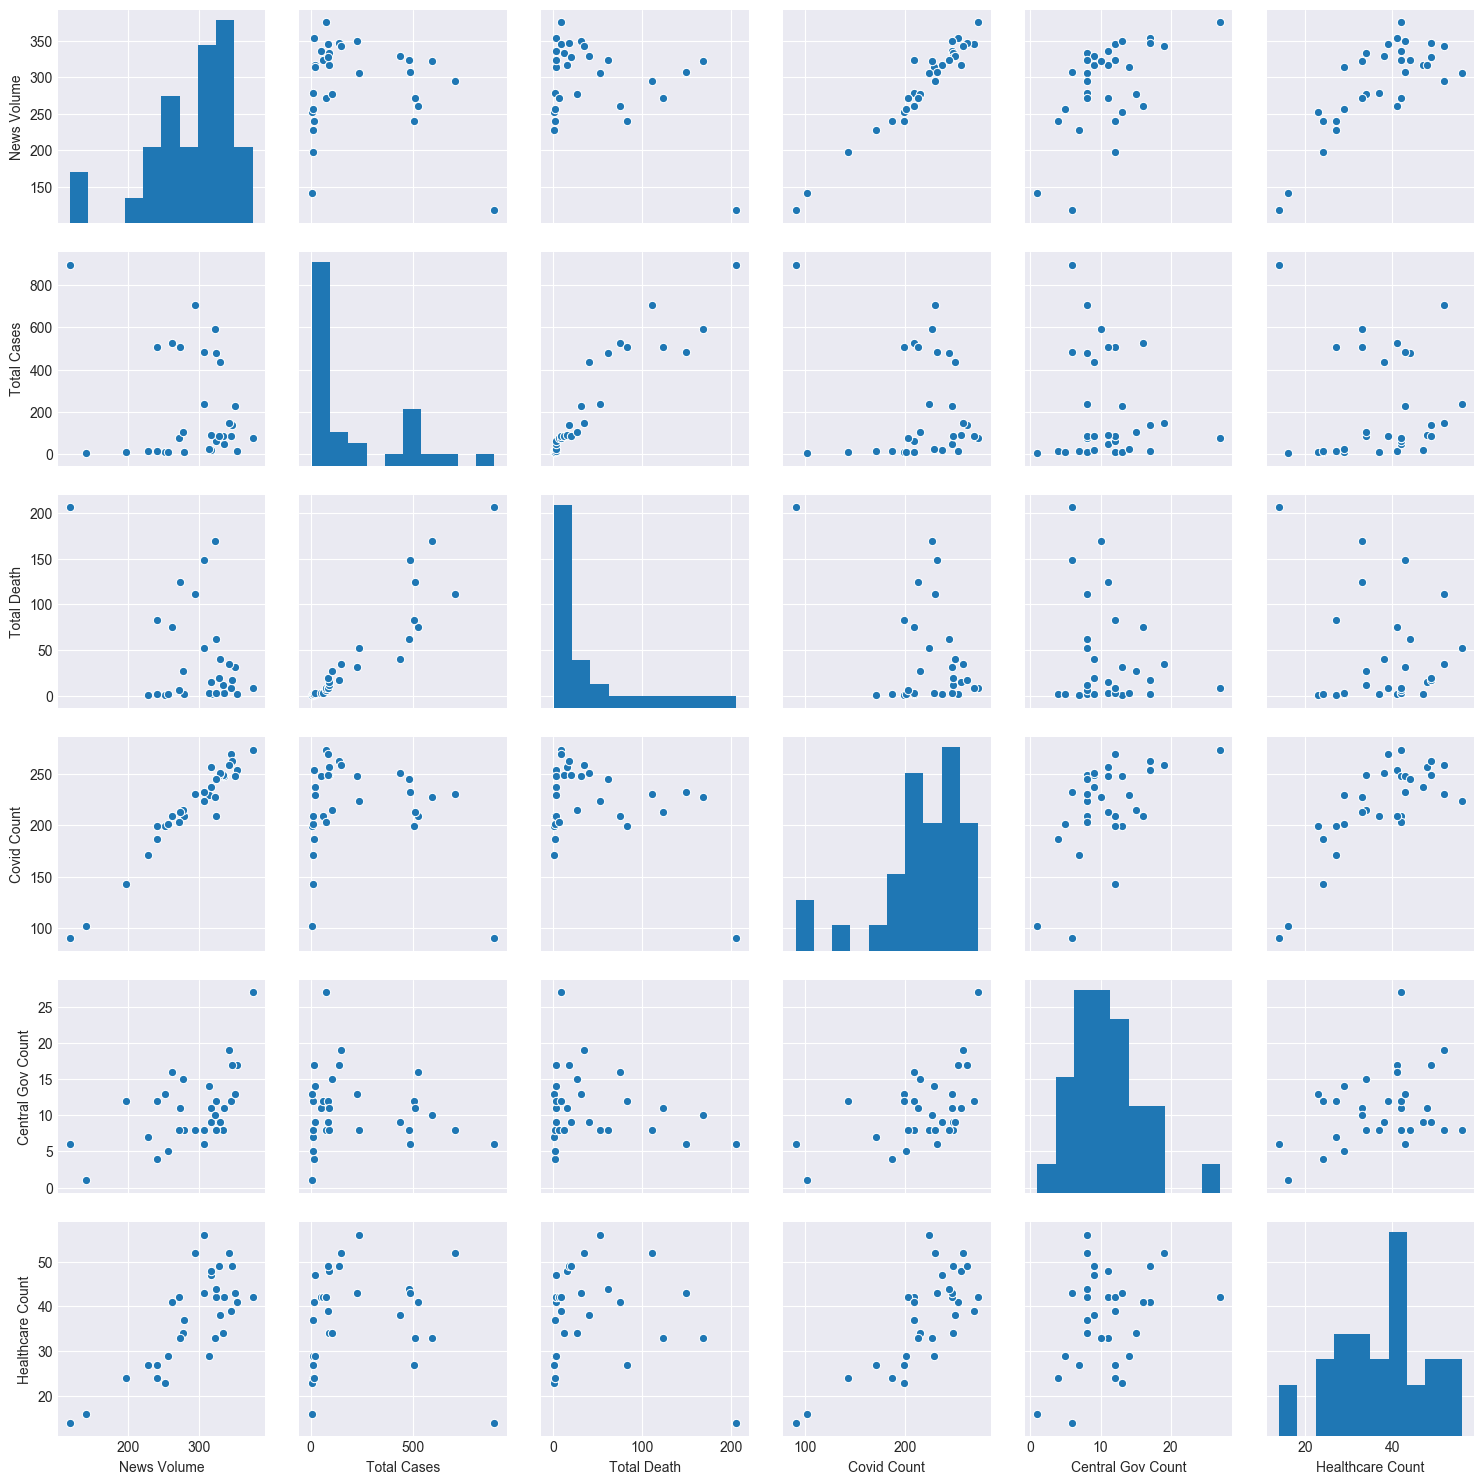

In [316]:
sns.pairplot(df_merged_extended)

In [323]:
corr = df_merged_extended.corr()
corr

,News Volume,Total Cases,Total Death,Covid Count,Central Gov Count,Healthcare Count
News Volume,1.000000,-0.199127,-0.408965,0.972193,0.542093,0.771774
Total Cases,-0.199127,1.000000,0.929872,-0.154626,-0.127240,-0.011720
Total Death,-0.408965,0.929872,1.000000,-0.405884,-0.225622,-0.186248
Covid Count,0.972193,-0.154626,-0.405884,1.000000,0.527359,0.775930
Central Gov Count,0.542093,-0.127240,-0.225622,0.527359,1.000000,0.338683
Healthcare Count,0.771774,-0.011720,-0.186248,0.775930,0.338683,1.000000


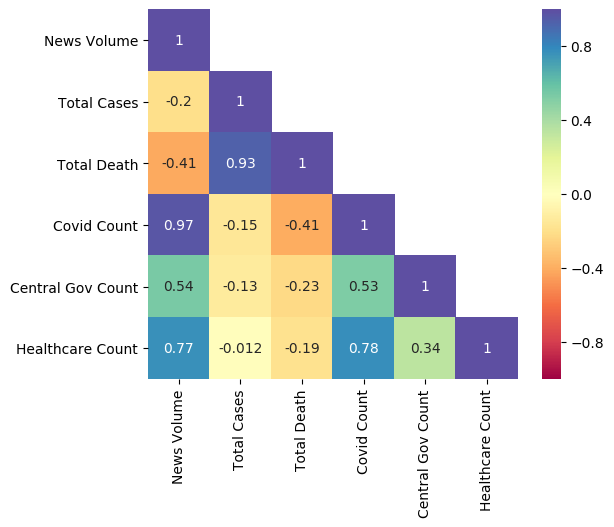

In [354]:
mask_matrix=np.zeros_like(corr)
mask_matrix[np.triu_indices_from(mask_matrix)] = True
mask_matrix = 1 - mask_matrix.T
plt.style.use('default')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, square=True, cmap='Spectral', mask = mask_matrix)